In [1]:
import sys
sys.path.append('/home/obesity')
import argparse
import os
from obesity.data_preproocessing import write_obesity_patient_snp_data
from obesity.snp_encoding_traintest_split import random_sample_normal_data_equal_to_obesity, snp_encoding_and_labeling, split
from obesity.model import dense_model
from obesity.model_evaluation import show_train_history

In [2]:
input_ped_path = '/home/obesity/input_data/ped/TWB2_male_3060_bmi2430_exclude_random7500_1_ped.ped'
patient_data = '/home/obesity/input_data/MOlist.csv'
snp_data_output_root = '/home/obesity/snp_data/test'

In [3]:
# data preprocessing
obesity_data_path, normal_data_path = write_obesity_patient_snp_data(input_ped_path, patient_data, snp_data_output_root)

In [4]:
# randomly sample data from normal SNP data to make the amount is equal to obesity SNP data
O_data, N_data_sampled = random_sample_normal_data_equal_to_obesity(obesity_data_path, normal_data_path)

# concatenate obesity and normal SNP data
# give labels
# normal : 0 , obesity : 1
data_encoded, labels = snp_encoding_and_labeling(O_data, N_data_sampled)

In [5]:
# train test split
# set train test data save root
train_test_encoded_data_and_labels_save_root = '/home/obesity/json_data/TWB2_male_3060_bmi2430_exclude_random7500_1_ped'
train_data, test_data, train_labels, test_labels = split(data_encoded, labels, test_size=0.1, random_state = 10, save = True, output_root = train_test_encoded_data_and_labels_save_root)

train test encoded data and labels saved


In [8]:
#load model
model = dense_model(train_data)

In [ ]:
# plot model
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=False)

In [10]:
#train model
t_m = model.fit(train_data, train_labels, batch_size=500, validation_split=0.1, epochs=3)

Train on 2714 samples, validate on 302 samples
Epoch 1/3
2714/2714 [==============================] - 2s 769us/sample - loss: 0.7025 - accuracy: 0.5059 - val_loss: 0.6956 - val_accuracy: 0.4702
Epoch 2/3
2714/2714 [==============================] - 1s 432us/sample - loss: 0.7018 - accuracy: 0.5018 - val_loss: 0.6916 - val_accuracy: 0.5298
Epoch 3/3
2714/2714 [==============================] - 1s 459us/sample - loss: 0.6980 - accuracy: 0.4996 - val_loss: 0.6919 - val_accuracy: 0.5298


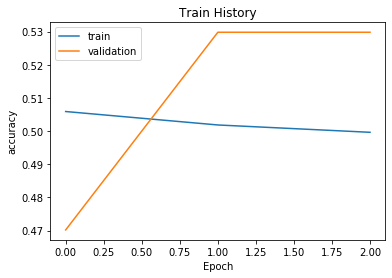

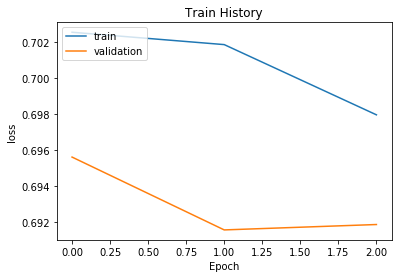

In [19]:
show_train_history(t_m ,'accuracy','val_accuracy')
show_train_history(t_m ,'loss','val_loss')

In [13]:
# show metric
# accuracy,precision,sensitivity,specificity,f1,mcc
metric_array(test_data, test_labels, model)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[0.5, 0.5, 1.0, 0.0, 0.6666666666666666, 0.0]